**PROGRAMMING FOR DATA SCIENCE:** Final Project

**Name:** Letizia

**Surname:** Lanza

**ID:** VR502321

**PART 1: Data Exploration and Data Wrangling**

**1. Explore the dataset:** your first task is to explore the data as seen in class, finding correlations between attributes and finding some interesting aspects that justify the next parts of the analysis.

*ATTENTION:* the topic of correlation between variables will be implemented at the end of point 3 (show some interesting plots).

The chosen dataset is available at the following Kaggle's link: https://www.kaggle.com/datasets/adarshde/electric-vehicle-population-dataset/data. 

The dataset is about the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL) and on the roads of The United States of America.

In [74]:
#import libraries

import os 
import zipfile
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [75]:
zip_file_path = 'Electric_Vehicle_Population_Data.csv.zip'  #specify the path to the ZIP file

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:  #open the ZIP file and extract the CSV file inside it
    zip_ref.extract('Electric_Vehicle_Population_Data.csv', '.')  #extract the file to the current directory

electric_vehicles = pd.read_csv('Electric_Vehicle_Population_Data.csv')  #load the extracted CSV file into a pandas dataframe 
electric_vehicles


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191402,5YJ3E1EA0K,Pierce,Sumner,WA,98390.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,31.0,314927896,POINT (-122.2337855 47.2055969),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396.0,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,236213120,POINT (-122.0478543 47.1075591),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191404,7SAYGDEE4R,King,Fall City,WA,98024.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,261335896,POINT (-121.903093 47.567116),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,219273491,POINT (-123.807422 46.978243),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10


In [76]:
electric_vehicles = electric_vehicles.drop(['VIN (1-10)', 'County', 'Postal Code', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'], axis = 1)  #drop specified columns from the dataframe
electric_vehicles

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
0,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,PACIFICORP
2,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,PUGET SOUND ENERGY INC
4,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,PACIFICORP
...,...,...,...,...,...,...,...,...,...,...
191402,Sumner,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191403,Wilkeson,WA,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191404,Fall City,WA,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191405,Aberdeen,WA,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...


In [77]:
electric_vehicles.info(verbose = True, show_counts = True)  #display detailed information about the dataframe, including column, non-null count and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 10 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   City                                               191403 non-null  object
 1   State                                              191407 non-null  object
 2   Model Year                                         191407 non-null  int64 
 3   Make                                               191407 non-null  object
 4   Model                                              191407 non-null  object
 5   Electric Vehicle Type                              191407 non-null  object
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  191407 non-null  object
 7   Electric Range                                     191407 non-null  int64 
 8   Base MSRP                                          191407 non-null  int64 
 9   Elec

In [78]:
electric_vehicles.describe()  #generate descriptive statistics for the dataframe 

,Model Year,Electric Range,Base MSRP
count,191407.000000,191407.000000,191407.000000
mean,2020.732335,55.657442,994.773258
std,2.990487,90.151930,8050.523372
min,1997.000000,0.000000,0.000000
25%,2019.000000,0.000000,0.000000
50%,2022.000000,0.000000,0.000000
75%,2023.000000,72.000000,0.000000
max,2025.000000,337.000000,845000.000000


In [79]:
electric_vehicles.describe().T  #generate descriptive statistics for the dataframe and transpose the result for better readability

,count,mean,std,min,25%,50%,75%,max
Model Year,191407.0,2020.732335,2.990487,1997.0,2019.0,2022.0,2023.0,2025.0
Electric Range,191407.0,55.657442,90.151930,0.0,0.0,0.0,72.0,337.0
Base MSRP,191407.0,994.773258,8050.523372,0.0,0.0,0.0,0.0,845000.0


In [80]:
electric_vehicles.head()  #display the first 5 rows of the dataframe 

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
0,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,PACIFICORP
2,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,PUGET SOUND ENERGY INC
4,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,PACIFICORP


In [81]:
electric_vehicles.tail()  #display the last 5 rows of the dataframe 

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
191402,Sumner,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191403,Wilkeson,WA,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191404,Fall City,WA,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191405,Aberdeen,WA,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...
191406,Richland,WA,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...


In [82]:
electric_vehicles.columns  #display the names of all columns in the dataframe 

Index(['City', 'State', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Electric Utility'],
      dtype='object')

**2. Clean up the dataset:** this step encompasses the replacement of null values with appropriate data or their outright removal. During this step you are encouraged to modify the data according to the consideration matured during the exploration.

In [83]:
electric_vehicles.isnull()  #create a dataframe indicating which entries in the original dataframe are null (True) or not null (False)

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
191402,False,False,False,False,False,False,False,False,False,False
191403,False,False,False,False,False,False,False,False,False,False
191404,False,False,False,False,False,False,False,False,False,False
191405,False,False,False,False,False,False,False,False,False,False


In [84]:
electric_vehicles.isnull().sum()  #calculate the number of missing (null) values for each column in the dataframe 

City                                                 4
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Electric Utility                                     4
dtype: int64

In [85]:
electric_vehicles = electric_vehicles.dropna()  #remove rows with any missing (null) values from the dataframe
electric_vehicles

,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
0,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,PACIFICORP
2,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,PUGET SOUND ENERGY INC
4,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,PACIFICORP
...,...,...,...,...,...,...,...,...,...,...
191402,Sumner,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191403,Wilkeson,WA,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191404,Fall City,WA,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
191405,Aberdeen,WA,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...


In [86]:
electric_vehicles.shape  #display the number of rows and columns in the dataframe 

(191403, 10)

**3. Show some interesting plots:** an essential skill of a data scientist is being able to show the important information by using easily understandable graphs. Use the libraries introduced in class to show case some interesting aspects of the dataset. An additional 2 points can be awarded for code cleanliness.

In [87]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 

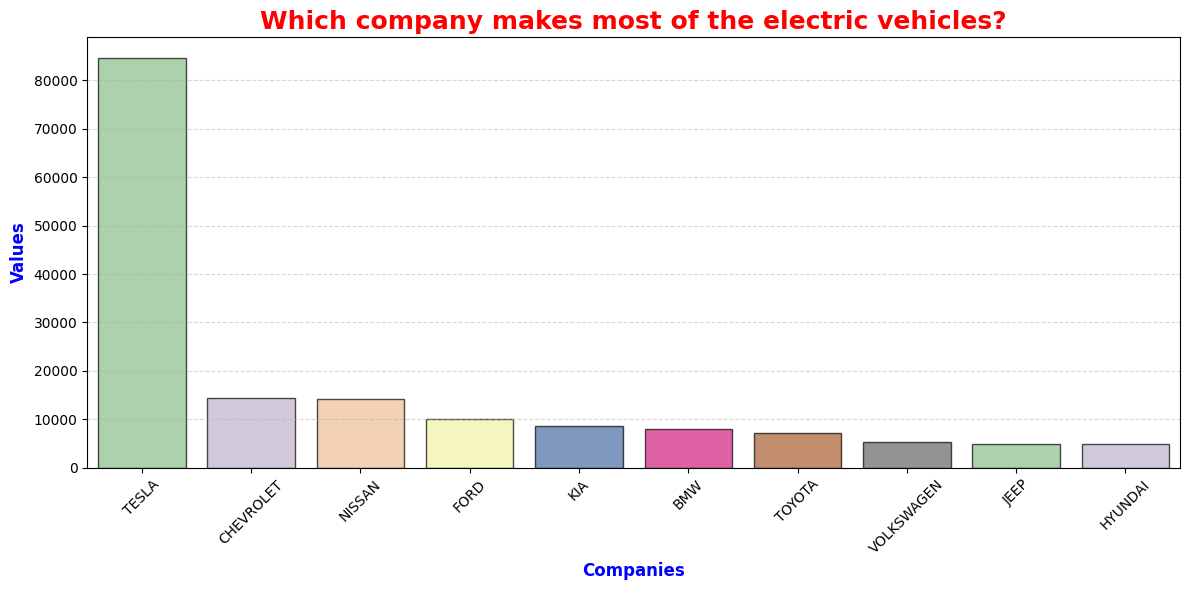

TESLA: 84667
CHEVROLET: 14320
NISSAN: 14239
FORD: 10048
KIA: 8671
BMW: 7993
TOYOTA: 7181
VOLKSWAGEN: 5408
JEEP: 4996
HYUNDAI: 4977


In [88]:
#group by 'Make', count occurrences, sort by 'City' in descending order 
grouped_data = electric_vehicles.groupby('Make').count().sort_values(by = 'City', ascending = False)
companies = grouped_data.index
values = grouped_data['City'].values

#select just the top 10 companies 
top_companies = companies[:10]
top_values = values[:10]

#plot the 10 companies
plt.figure(figsize = (12, 6))
sns.barplot(x = top_companies, y = top_values, edgecolor = 'black', linewidth = 1, alpha = 0.7, palette = 'Accent', hue=list(companies)[:10], dodge = False, legend = False)
plt.xlabel('Companies', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.ylabel('Values', fontsize = 12, fontweight = 'bold', color = 'blue')
plt.title('Which company makes most of the electric vehicles?', fontsize = 18, fontweight = 'bold', color = 'red')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Companies')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

#print top 10 companies and their values 
for i in range(10):
    print(f"{companies[i]}: {values[i]}")

In [89]:
#for each top 10 company, find and print the top selling model and its count
for company in top_companies:
    data = electric_vehicles[electric_vehicles['Make'] == company]
    top_model_data = data.groupby('Model').size().sort_values(ascending = False)
    top_model = top_model_data.index[0]
    model_count = top_model_data.iloc[0]
    print(f"The top selling model for {company} is {top_model} with {model_count} units sold")

The top selling model for TESLA is MODEL Y with 39521 units sold
The top selling model for CHEVROLET is BOLT EV with 6444 units sold
The top selling model for NISSAN is LEAF with 13439 units sold
The top selling model for FORD is MUSTANG MACH-E with 3758 units sold
The top selling model for KIA is NIRO with 3358 units sold
The top selling model for BMW is X5 with 2456 units sold
The top selling model for TOYOTA is PRIUS PRIME with 2985 units sold
The top selling model for VOLKSWAGEN is ID.4 with 4337 units sold
The top selling model for JEEP is WRANGLER with 3743 units sold
The top selling model for HYUNDAI is IONIQ 5 with 2747 units sold


In [102]:
sales_data = {
    'Company': [],
    'Total Sales': [],
    'Top Model Sales': [],
    'Percentage of Top Model': []
}

for company in top_companies:
    data = electric_vehicles[electric_vehicles['Make'] == company]
    total_sales = data.shape[0]
    top_model_data = data.groupby('Model').size().sort_values(ascending=False)
    top_model = top_model_data.index[0]
    model_count = top_model_data.iloc[0]
    
    #calculate the percentage of the top selling model relative to total sales
    percentage = (model_count / total_sales) * 100
    print(f"Percentage of total sales for {top_model} is {percentage:.2f}%")
    
    sales_data['Company'].append(company)
    sales_data['Total Sales'].append(total_sales)
    sales_data['Top Model Sales'].append(model_count)
    sales_data['Percentage of Top Model'].append(percentage)
    
df_sales = pd.DataFrame(sales_data)

Percentage of total sales for MODEL Y is 46.68%
Percentage of total sales for BOLT EV is 45.00%
Percentage of total sales for LEAF is 94.38%
Percentage of total sales for MUSTANG MACH-E is 37.40%
Percentage of total sales for NIRO is 38.73%
Percentage of total sales for X5 is 30.73%
Percentage of total sales for PRIUS PRIME is 41.57%
Percentage of total sales for ID.4 is 80.20%
Percentage of total sales for WRANGLER is 74.92%
Percentage of total sales for IONIQ 5 is 55.19%


<Figure size 1200x1200 with 0 Axes>

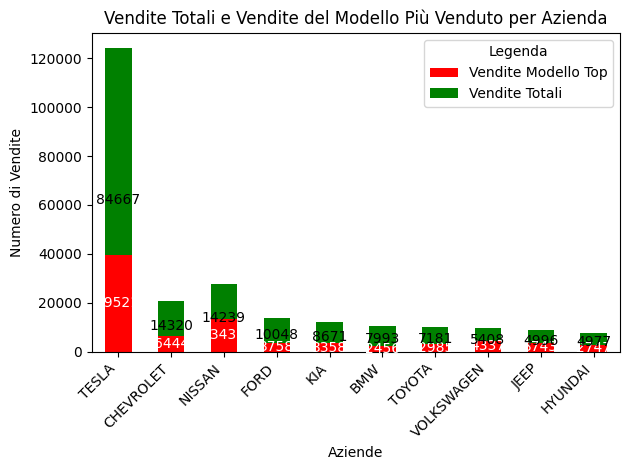

In [109]:
# Imposta i dati per il grafico a barre impilato
df_plot = df_sales.set_index('Company')[['Top Model Sales', 'Total Sales']]

# Creiamo il grafico a barre impilato
plt.figure(figsize=(12, 12))
df_plot.plot(kind='bar', stacked=True, color=['red', 'green'])

# Aggiungi le etichette sopra le barre
for i, (top_model, total_sales) in enumerate(zip(df_plot['Top Model Sales'], df_plot['Total Sales'])):
    plt.text(i, top_model / 2, f'{top_model}', ha='center', va='center', color='white', fontsize=10)
    plt.text(i, top_model + (total_sales - top_model) / 2, f'{total_sales}', ha='center', va='center', color='black', fontsize=10)

# Etichette e titoli
plt.title('Vendite Totali e Vendite del Modello Più Venduto per Azienda')
plt.xlabel('Aziende')
plt.ylabel('Numero di Vendite')
plt.xticks(rotation=45, ha='right')
plt.legend(['Vendite Modello Top', 'Vendite Totali'], title='Legenda')

# Mostra il grafico
plt.tight_layout()
plt.show()